# Final Project
Violet Afzal<br>
Maya Dubove<br>
Emme Erwin<br>
Jacqui Sabino

## Description
We have a dataset `data.csv` containing 29 customer attributes for 2240 company customers, compiled for the purpose of customer personality analysis. This data can be used to better understand (and hopefully predict) customer spending habits, which enables more effective advertising and positive customer experiences. For example, perhaps online buyers are less likely to buy fruit, so this company can focus their fruit-oriented advertising elsewhere and find the niches that online buyers fit into.
<br><br>
We will be using the dataset's attributes to predict the amount spent on `TODO wine or fruit or idk` in the last 2 years. This can outline how likely a customer is to spend a significant amount of money on `thing`, and therefore who to advertise `thing` to.
<br><br>
We'll begin a very brief exploration of our data in order to conduct data cleaning.

This dataset contains the following attributes, separated by four main categories (with descriptions given by the dataset's author):

1. People
- `ID` (unique)
- `Year_Birth`
- `Education`
- `Marital_Status`
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products: the amount spent on <i>product</i> in the last 2 years (ex. fruits)
- `MntWines`
- `MntFruits`
- `MntMeatProducts`
- `MntFishProducts`
- `MntSweetProducts`
- `MntGoldProds`

3. Promotion
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in Campaign 1, 0 otherwise
- `AcceptedCmp2`
- `AcceptedCmp3`
- `AcceptedCmp4`
- `AcceptedCmp5`
- `Response` (for the final campaign; still 1 or 0)

4. Place: the number of purchases via <i>medium</i> (ex. Web)
- `NumWebPurchases`
- `NumCatalogPurchases`
- `NumStorePurchases`
- `NumWebVisitsMonth`: Number of visits to company website in the last month

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allow Jupyter to display graphs
%matplotlib inline

# Read in dataset and display it
data = pd.read_csv('data.csv', sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning

We aren't given any information as to what `Z_CostContact` or `Z_Revenue` represent. Let's see how they're distributed.

<AxesSubplot:title={'center':'Distribution by Z_Revenue'}, xlabel='Z_Revenue', ylabel='Number of Responses'>

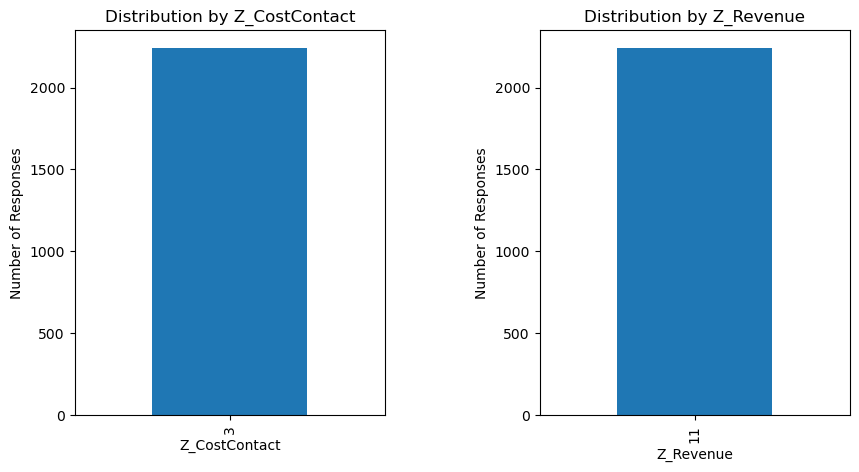

In [2]:
# Create two subplots to display both distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Add space between the subplots
plt.subplots_adjust(wspace=0.5)

# Split dataset by Z_CostContact
Z_CostContact_groups = data.groupby('Z_CostContact')
Z_CostContact_groups.size().plot(kind='bar',
                                 title='Distribution by Z_CostContact',
                                 ax=axes[0],
                                 xlabel='Z_CostContact',
                                 ylabel='Number of Responses')

# Split dataset by Z_Revenue
Z_Revenue_groups = data.groupby('Z_Revenue')
Z_Revenue_groups.size().plot(kind='bar',
                             title='Distribution by Z_Revenue',
                             ax=axes[1],
                             xlabel='Z_Revenue',
                             ylabel='Number of Responses')

It appears as though every customer has the same values of `Z_CostContact = 3` and `Z_Revenue = 11`. Since these attributes are neither defined nor unique, we can safely drop them from the dataset.
<br><br>
We also have no use for the `ID` column (since each record is already on a unique row in `data`), so we'll drop that as well.

In [3]:
data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


Let's now take a look at how many missing values this dataset has.

In [4]:
# Number of missing values by column
print(data.isnull().sum())

# Total
print(f"\nTotal number of missing values: {data.isnull().sum().sum()}")

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Total number of missing values: 24


Evidently, we just have to deal with 24 records, or 1.1% of our dataset. Unfortunately, these records have no `Income` attribute, which is likely quite tied to the number of `TODO thing`. We've therefore opted to simply drop these records.

In [5]:
# Drop records missing Income
data.dropna(subset=['Income'], inplace=True)

# Prove that we have no more missing values
print(f"Total number of missing values: {data.isnull().sum().sum()}")

Total number of missing values: 0


We'd also like to convert any qualitative data into quantitative data, since we're going to be conducting regression. Thus, we'll start by one-hot encoding `Education` and `Marital_Status`.

In [6]:
data = pd.get_dummies(data=data, columns=['Education', 'Marital_Status'], drop_first=True)
for attr in data.columns:
    print(attr)

Year_Birth
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response
Education_Basic
Education_Graduation
Education_Master
Education_PhD
Marital_Status_Alone
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Together
Marital_Status_Widow
Marital_Status_YOLO


Most of our columns look meaningful, but keeping 7 marital statuses seems excessive. In particular, we're not sure what the tangible differences between `Marital_Status_Alone`, `Marital_Status_YOLO`, and `Marital_Status_Single` are. Let's first see how many records would be impacted by a potential merge.

In [7]:
print(f"{data['Marital_Status_Alone'].sum()} Marital_Status_Alone instances")
print(f"{data['Marital_Status_YOLO'].sum()} Marital_Status_YOLO instances")
print(f"{data['Marital_Status_Single'].sum()} Marital_Status_Single instances")

3 Marital_Status_Alone instances
2 Marital_Status_YOLO instances
471 Marital_Status_Single instances


If we consider these statuses to be one collective, only 1% of single people consider themselves alone or YOLO. We'll combine them into one `Marital_Status_Single` status, and drop the other statuses. We also know that, due to the nature of one-hot encoding, no record will have `Marital_Status_Single > 1`, so the records will remain valid.

In [8]:
data['Marital_Status_Single'] = data['Marital_Status_Single'] + data['Marital_Status_Alone'] + data['Marital_Status_YOLO']
data.drop(columns=['Marital_Status_Alone', 'Marital_Status_YOLO'], inplace=True)

print(f"{data['Marital_Status_Single'].sum()} Marital_Status_Single instances") # Expect 476

for attr in data.columns:
    print(attr)

476 Marital_Status_Single instances
Year_Birth
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response
Education_Basic
Education_Graduation
Education_Master
Education_PhD
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Together
Marital_Status_Widow


We also want `Dt_Customer` to be numeric. We can manipulate a date to become the number of months that a customer has been with the company, relative to the newest customer. For example, if the last customer registered in June 2014, then the customer with `Dt_Customer = 19-01-2014` has been with the company for at least 5 months.

In [9]:
print(f"Date: {data['Dt_Customer'].iloc[2]}")
print(f"Month: {data['Dt_Customer'].iloc[2][3:5]}")
print(f"Year: {data['Dt_Customer'].iloc[2][6:10]}")

Date: 21-08-2013
Month: 08
Year: 2013


This sample customer shows that each date consists of a string, whose month is in indices [3, 5), and whose year in indices [6-10). We'll use this knowledge to convert `Dt_Customer` accordingly.

In [11]:
# Extract months and years
months = [int(data['Dt_Customer'].iloc[i][3:5]) for i in range(len(data))]
years = [int(data['Dt_Customer'].iloc[i][6:10]) for i in range(len(data))]

# Combine into a total_months list
min_year = min(years)
total_months = [12 * (years[i] - min_year) + months[i] for i in range(len(years))]

# Replace Dt_Customer entries
for i in range(len(data)):
    data['Dt_Customer'].iloc[i] = total_months[i]

# Show that the column has been changed
data

/var/folders/2c/9cs72q490pv6s8_fr1x_j5b40000gn/T/ipykernel_13265/1274225662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'].iloc[i] = total_months[i]


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,9,58,635,88,546,172,...,1,0,1,0,0,0,0,1,0,0
1,1954,46344.0,1,1,27,38,11,1,6,2,...,0,0,1,0,0,0,0,1,0,0
2,1965,71613.0,0,0,20,26,426,49,127,111,...,0,0,1,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,26,11,4,20,10,...,0,0,1,0,0,0,0,0,1,0
4,1981,58293.0,1,0,25,94,173,43,118,46,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,18,46,709,43,182,42,...,0,0,1,0,0,0,1,0,0,0
2236,1946,64014.0,2,1,30,56,406,0,30,0,...,0,0,0,0,1,0,0,0,1,0
2237,1981,56981.0,0,0,25,91,908,48,217,32,...,0,0,1,0,0,1,0,0,0,0
2238,1956,69245.0,0,1,25,8,428,30,214,80,...,0,0,0,1,0,0,0,0,1,0


Now, we'll deal with outliers by removing them from our dataset in order to best capture trends.
<br><br>
We'll start by taking a look at `Income`, an attribute for which outliers may be particularly damaging.

<AxesSubplot:>

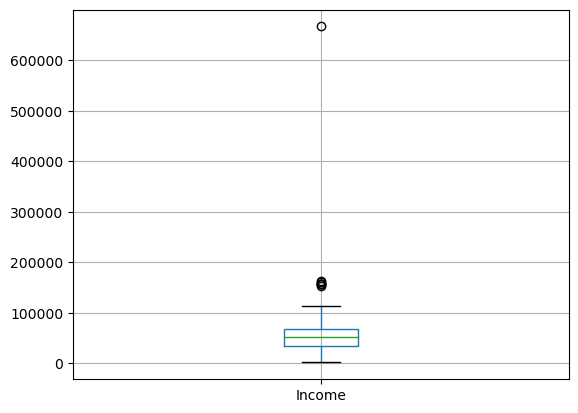

In [12]:
data.boxplot(column=['Income'])

Let's determine how many records have `Income >= 120000`.

In [13]:
Income_outliers = data[data['Income'] >= 120000]
print(f"Number of outliers: {len(Income_outliers)}")

Number of outliers: 8


Luckily, we only have 8 outliers, so we can simply remove them without much harm.

<AxesSubplot:>

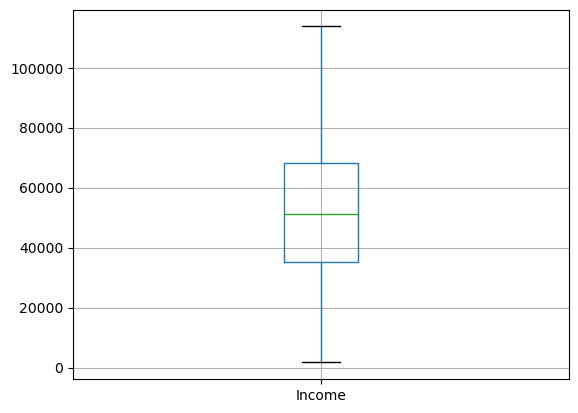

In [14]:
data = data[data['Income'] <= 120000]
data.boxplot(column=['Income'])